In [1]:
pip install pytrends matplotlib seaborn plotly pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
#PyTrends Setup aur Keyword Define Karna:
pytrends = TrendReq(hl='en-US', tz=360)
keyword = "cloud computing"  # we chnage keyword as per our wish


In [7]:
# Data Request Karna
pytrends.build_payload([keyword], cat=0, timeframe='today 12-m', geo='', gprop='')

In [9]:
# get Country-wise Interest 
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by=keyword, ascending=False).head(15)

C:\Users\shrut\AppData\Local\Temp\ipykernel_28068\4270658539.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data[keyword], y=region_data.index, palette='Blues_d')


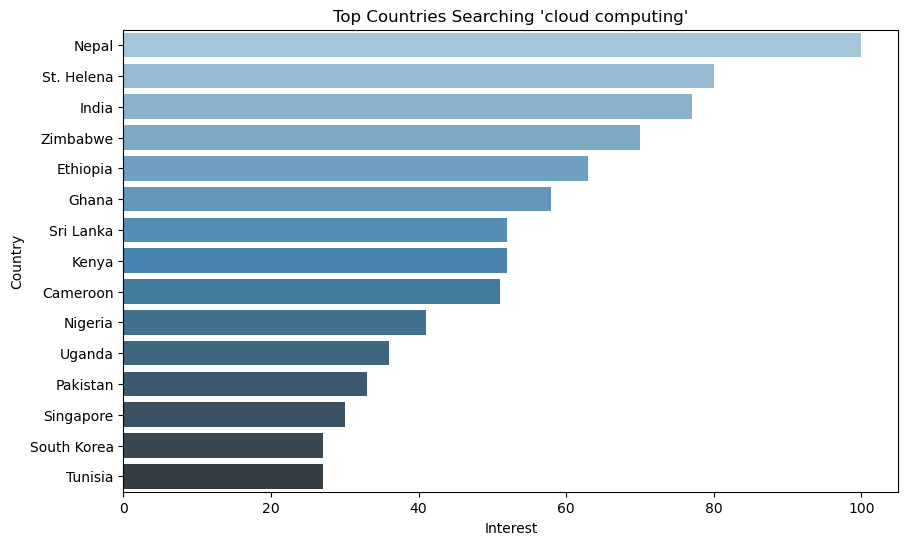

In [13]:
# Bar Plot Banana (Top Countries):
plt.figure(figsize=(10,6))
sns.barplot(x=region_data[keyword], y=region_data.index, palette='Blues_d')
plt.title(f"Top Countries Searching '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()


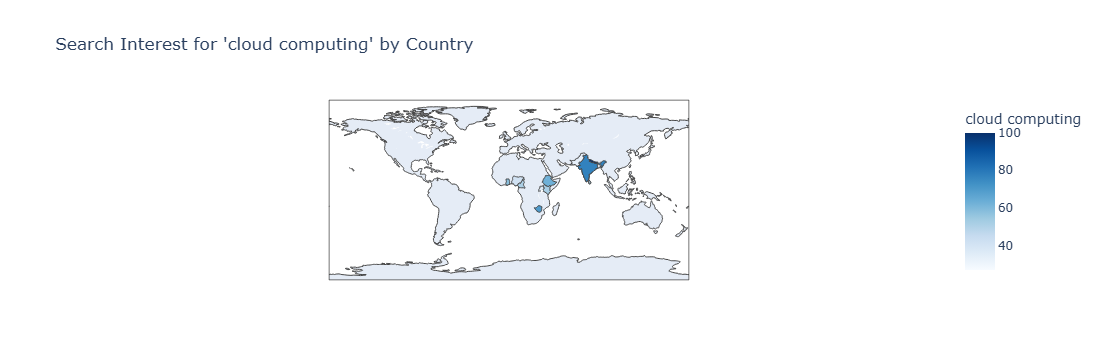

In [31]:
# Choropleth (World Map Plot):
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations='geoName',
                    locationmode='country names',
                    color=keyword,
                    title=f"Search Interest for '{keyword}' by Country",
                    color_continuous_scale='Blues')
fig.show()


In [17]:
# get Time-wise Interest
time_df = pytrends.interest_over_time()

C:\Users\shrut\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



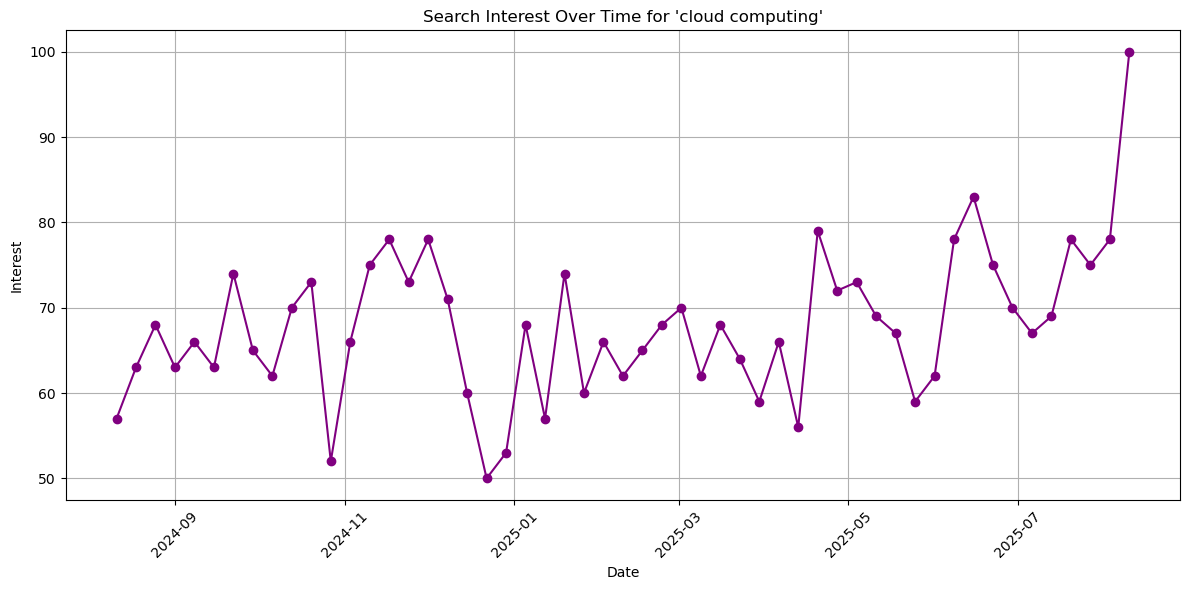

In [25]:
# Line Plot (Search Trend Over Time)
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker='o', color='purple')
plt.title(f"Search Interest Over Time for '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [27]:
# Multiple Keywords Compare Karna
kw_list = ["cloud computing", "data science", "machine learning"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')

C:\Users\shrut\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



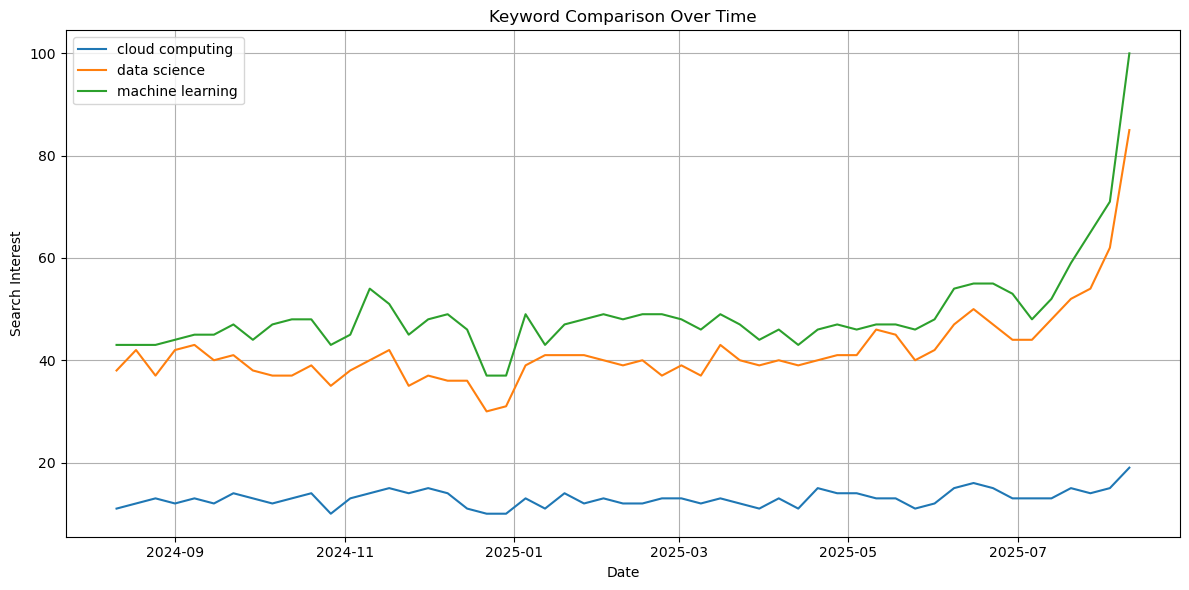

In [29]:
# Comparison Plot (Line Plot of All 3 Keywords)
compare_df = pytrends.interest_over_time()
plt.figure(figsize=(12,6))
for kw in kw_list:
 plt.plot(compare_df.index, compare_df[kw], label=kw)
plt.title("Keyword Comparison Over Time")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
